# machine learning and data visulization project 
## bigmarts sales forcasitng and analysis  

##### 1. Problem Understanding
###### Goal: Predict future item sales for each BigMart outlet.
###### Type of ML Problem: Supervised Regression OR XGB (predicting continuous values).
###### Business Use Case: Helps in stock planning, revenue forecasting, and reducing losses due to over/under-stocking.

## importing necessary library 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


### 2. data collection and analysis 

In [2]:
data=pd.read_csv('Train.csv') # load the data set as pandas data frame 


In [3]:
data.head()  # view the first 5 row of the data set 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info() # know the data types of each features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# know the number of colums and row that the data set hold 
data.shape 

(8523, 12)

#### Features Description:
##### Numerical features:
###### Item_Weight : Weight of the product or item.
###### Item_Visibility : The % of the total display area of all products in a store allocated to the particular product.
###### Item_MRP : Maximum Retail Price (list price) of the product
###### Outlet_Establishment_Year : The year in which the store was established.
###### Item_Outlet_Sales : sales of the product in a particular store. This is the target variable to be predicted.
#### Categorical features:
###### Item_Identifier : Unique product ID (we would want to drop this column later)
###### Item_Fat_Content : Whether the product is low, fat or not
###### Item_Type : The category to which the product belongs.
###### Outlet_Identifier : Unique store ID
###### Outlet_Size : The size of the store in terms of ground area covered.
###### Outlet_Location_Type : The type of city in which the store is located.
###### Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket.


#### 3. Exploratory Data Analysis (EDA)
###### Understand Data Distribution:

Key Insights in ths step is identify:
--Missing values
--Outliers
--Feature distributions
--Correlations between variables

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### A. Univariate Analysis (Single Variable Distributions)
1. Numerical Features:
for all numerical feature (Item_Weight,Item_visibility,Item_MPR,Item_Outlet_Sales) we pot histogram to know thier distribution and box plot to see possible outlier in the data set.

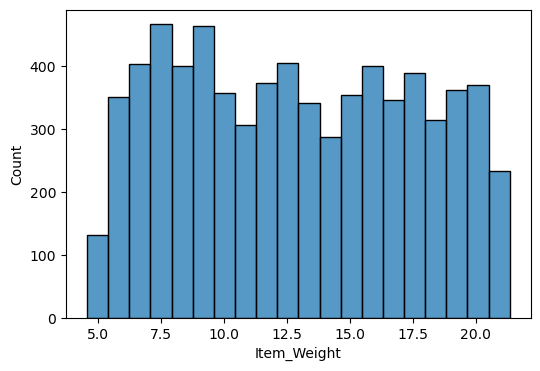

In [7]:
# histogram of item weight
plt.figure(figsize=(6, 4))
sns.histplot(data['Item_Weight'])
plt.savefig("Item_Weight.png")
plt.show()

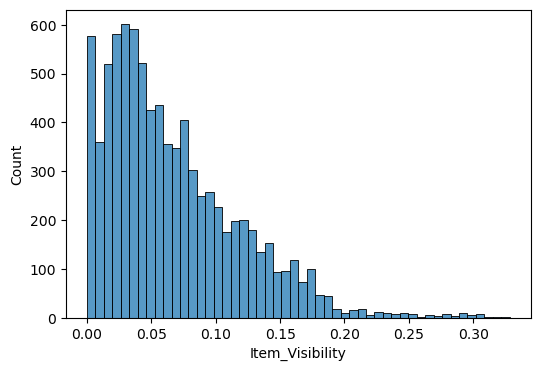

In [8]:
# histogram of Item_Visibility
plt.figure(figsize=(6, 4))
sns.histplot(data['Item_Visibility'])
plt.savefig("Item_Visibility.png")
plt.show()

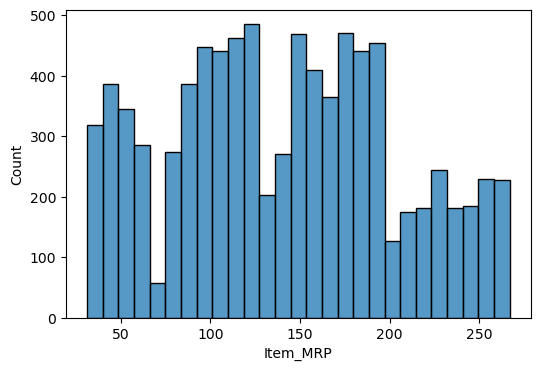

In [9]:
# histogram of Item_MRP
plt.figure(figsize=(6, 4))
sns.histplot(data['Item_MRP'])
plt.savefig("Item_MRP.png")
plt.show()

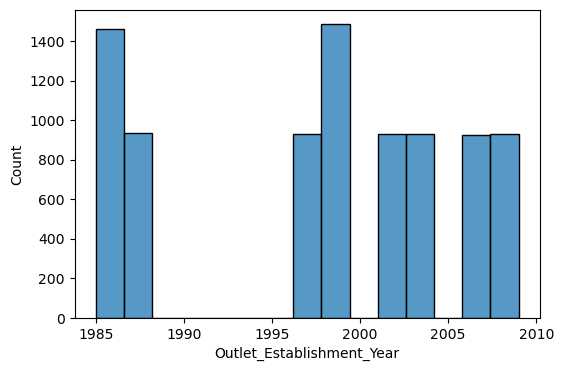

In [10]:
# histogram of Outlet_Establishment_Year
plt.figure(figsize=(6, 4))
sns.histplot(data['Outlet_Establishment_Year'])
plt.savefig("Outlet_Establishment_Year.png")
plt.show()

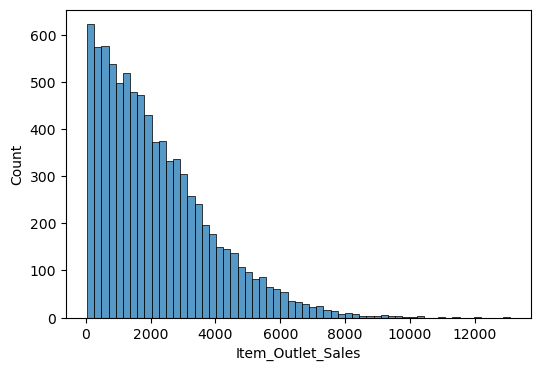

In [39]:
# histogram of Item_Outlet_Sales
plt.figure(figsize=(6, 4))
sns.histplot(data['Item_Outlet_Sales'])
plt.savefig("Item_Outlet_Sales.png")
plt.show()

##### Key Insights from Visualizations:
from the above plot We observe that the item weight range from 5 Kg to 20 Kg.
Item_Visibility feature is right skewed,Log transformation makes pattern clearer
Many items have very low visibility.
There are more products in the range of 100 MRP - 180 MRP,Fairly uniform distribution between 30-270 and No obvious outliers
in the Item_MRP feature 
We can observe that a lots of stores have been established in the years 1985, 1998 etc... and there was no store establishment between 1990 and 1995.
Item_Outlet_Sales feature is right skewed. We may try to do a transformation in order to obtain a normal distribution.


##### using box plot to identify possible outlier

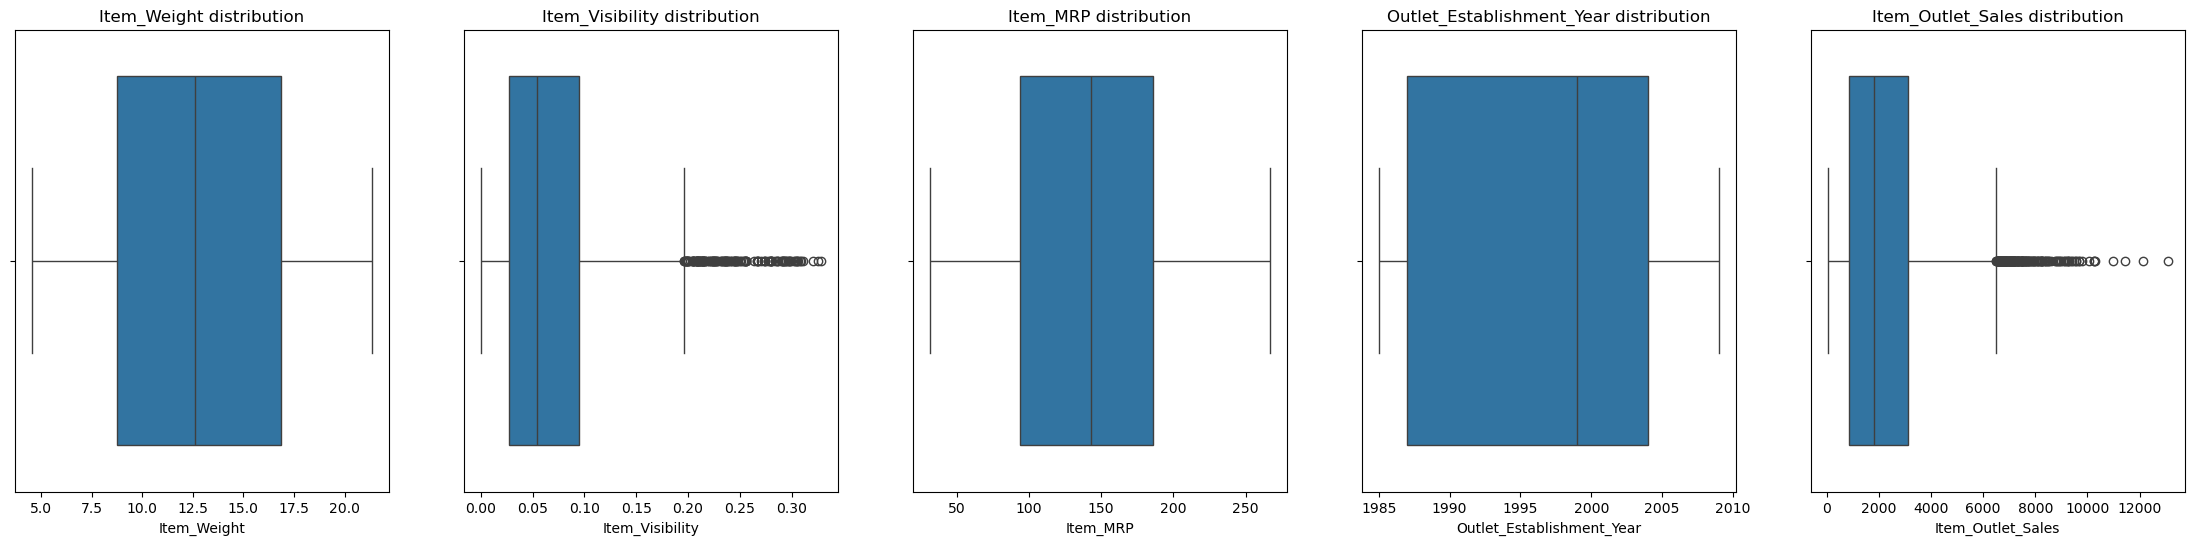

In [32]:
# show the distribution of all numerical colums using boxplot. 
_, ax =plt.subplots(nrows=1,ncols=5,figsize=(28,6)) # visulize all numerical columns side by side 
for index, col in enumerate(numerical_cols):
    sns.boxplot(x=data[col],ax=ax[index])
    ax[index].set_title(f'{col} distribution')
plt.show()

In [40]:
data.columns 

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

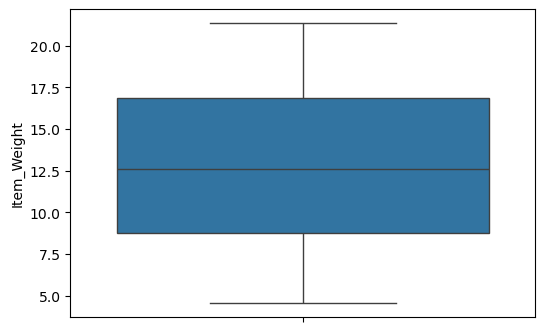

In [42]:
# box plot of Item_Weight
plt.figure(figsize=(6, 4))
sns.boxplot(data['Item_Weight'])
plt.savefig("box_Item_Weight.png")
plt.show()

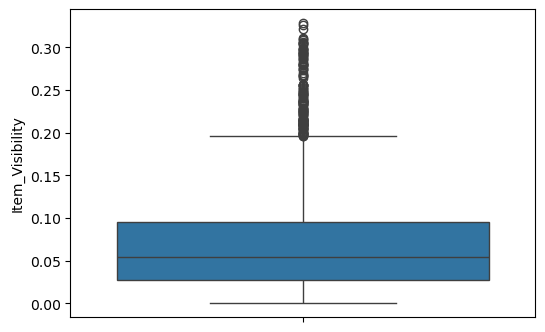

In [43]:
# box plot of Item_Visibility
plt.figure(figsize=(6, 4))
sns.boxplot(data['Item_Visibility'])
plt.savefig("box_Item_Visibility.png")
plt.show()

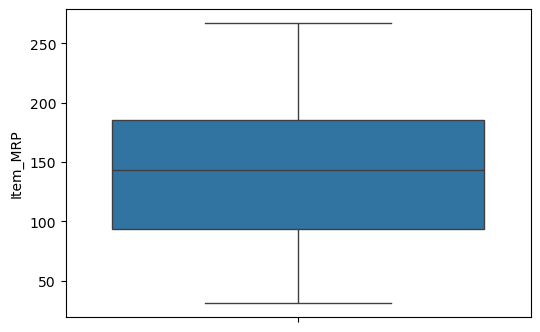

In [44]:
# box plot of Item_MRP
plt.figure(figsize=(6, 4))
sns.boxplot(data['Item_MRP'])
plt.savefig("box_Item_MRP.png")
plt.show()

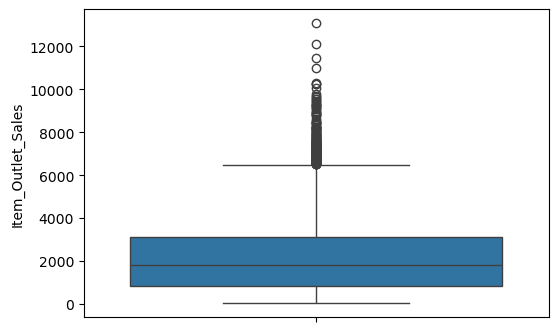

In [45]:
# box plot of Item_Outlet_Sales
plt.figure(figsize=(6, 4))
sns.boxplot(data['Item_Outlet_Sales'])
plt.savefig("box_Item_Outlet_Sales.png")
plt.show()

from the above box plot we observe that there is an outlier in the item_visiblity and item_outlet_sales columns so we have to detect it 
conversly there is no outlier that needs to be detect in the rest columns.

###### 2. Categorical Features:
and also we plot bar chart for all catagorical fature including Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size,Outlet_Location_Type and  Outlet_Typ

In [33]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

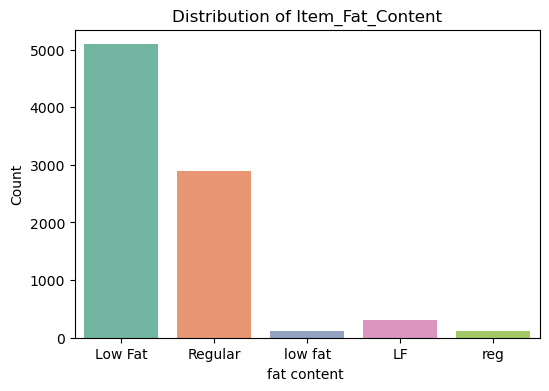

In [46]:
# bar plot for Item_Fat_Content
plt.figure(figsize=(6, 4))
sns.countplot(x='Item_Fat_Content', hue='Item_Fat_Content', data=data, palette='Set2', legend=False) #Colors the bars by the same variable (so each bar will have its own color from Set2).
plt.title('Distribution of Item_Fat_Content')
plt.xlabel('fat content ')
plt.ylabel('Count')
plt.savefig("Distribution of Item_Fat_Content.png")
plt.show()


 on the above plot The'Item_Fat_Content' column must be cleaned because there are some entry errors:
'Low Fat','low fat' and 'LF' should be the same category
Similarly 'Regular' and 'reg' should the same Another remark in this column is that 'Low Fat' item category is greater than 'Regular' one. so we have to rearrenge it.

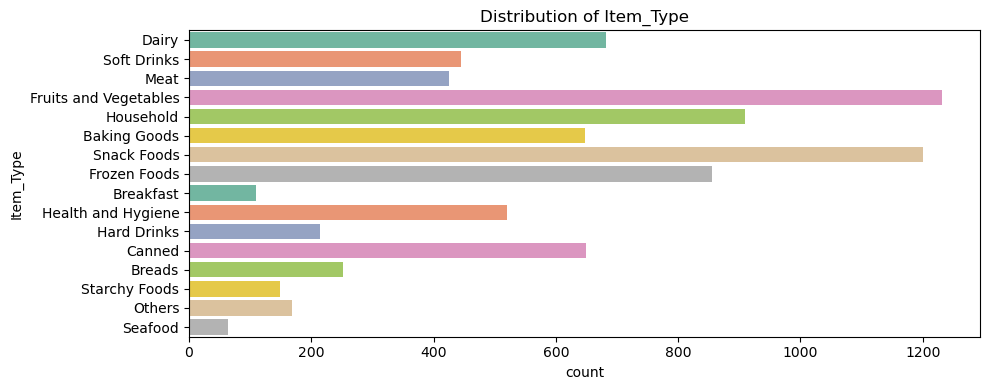

In [53]:
# bar plot for Item_Type
plt.figure(figsize=(10,4))
sns.countplot(y='Item_Type', hue='Item_Type', data=data, palette='Set2', legend=False) # horizontal bar chart for multiple catagory 
plt.title('Distribution of Item_Type')
plt.xlabel('count')
plt.ylabel('Item_Type')
plt.tight_layout()
plt.savefig("Distribution of Item_Type.png")
plt.show()


##### Item Types: form the above bar plot we observe that 
Fruits and Vegetables, Snack Foods, and Household are most common
Seafood, Breakfast, and Others are least common in the store 

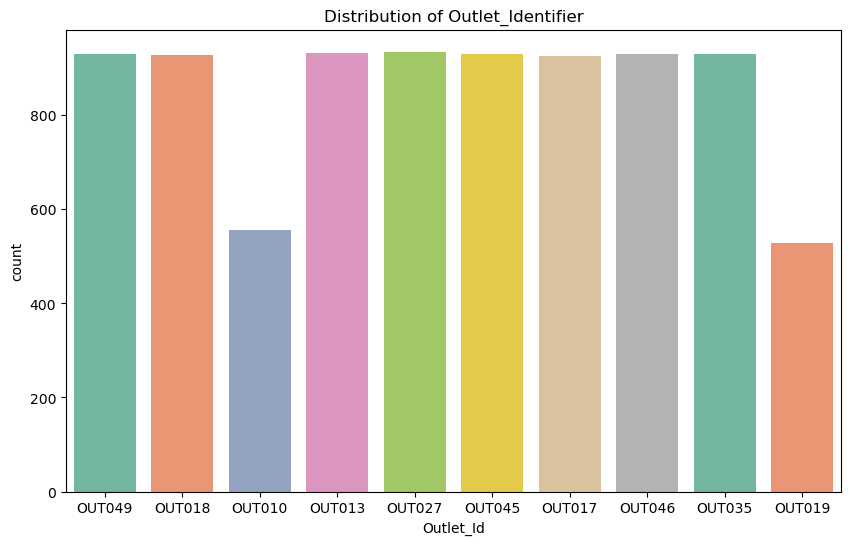

In [52]:
# bar plot for Outlet_Identifier
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Identifier', hue='Outlet_Identifier', data=data, palette='Set2', legend=False)
plt.title('Distribution of Outlet_Identifier')
plt.xlabel('Outlet_Id')
plt.ylabel('count')
plt.savefig("Distribution of Outlet_Identifier.png")
plt.show()


from  the above bar plot we understand that Each bar represents a unique Outlet_Identifier, such as OUT027, OUT013, etc.

The height of each bar shows how many items/sales entries are associated with that outlet.

Outlets OUT027, OUT013, OUT049, OUT046, OUT035, OUT045, OUT018, and OUT017 all have nearly equal and high counts, around 930–950 records each.

Outlets OUT010 and OUT019 have significantly fewer entries, around 500–550.

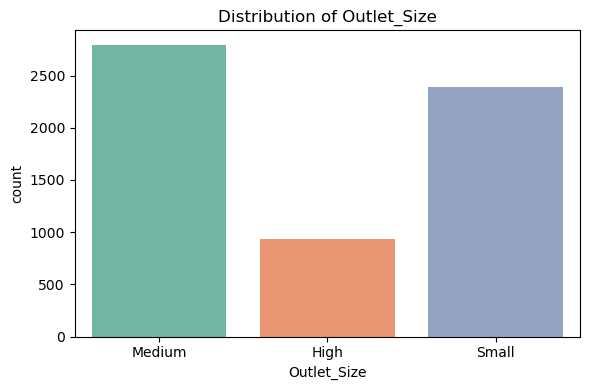

In [54]:
# bar plot for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Size', hue='Outlet_Size', data=data, palette='Set2', legend=False)
plt.title('Distribution of Outlet_Size')
plt.xlabel('Outlet_Size')
plt.ylabel('count')
plt.tight_layout()
plt.savefig("Distribution of Outlet_Size.png")
plt.show()



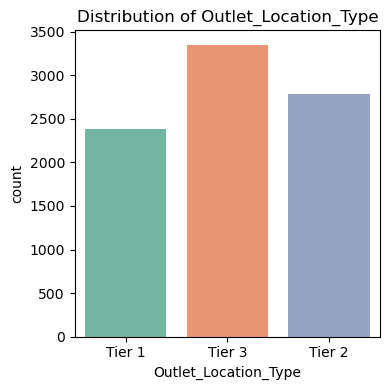

In [11]:
# bar plot for Outlet_Location_Type
plt.figure(figsize=(4,4))
sns.countplot(x='Outlet_Location_Type', hue='Outlet_Location_Type', data=data, palette='Set2', legend=False) 
plt.title('Distribution of Outlet_Location_Type')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('count')
plt.tight_layout()
plt.savefig("Distribution of Outlet_Location_Type.png")
plt.show()



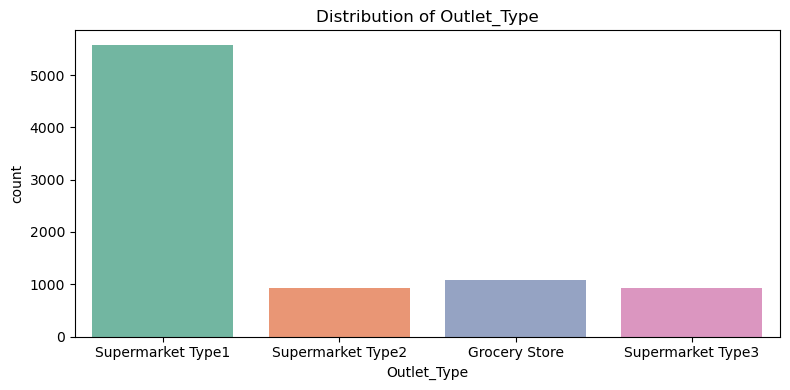

In [58]:
# bar plot for Outlet_Type
plt.figure(figsize=(8,4))
sns.countplot(x='Outlet_Type', hue='Outlet_Type', data=data, palette='Set2', legend=False) 
plt.title('Distribution of Outlet_Type')
plt.xlabel('Outlet_Type')
plt.ylabel('count')
plt.tight_layout()
plt.savefig("Distribution of Outlet_Type.png")
plt.show()


#### B. Bivariate Analysis
1. Numerical vs Numerical Relationships  

In [20]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [68]:
# appling general update patter on scatter plot 
def reusable_scatter_plot( x, y,x_label="X-axis",y_label="Y-axis",title="Scatter Plot",color='blue', marker='o', size=50,name= "Distribution of Outlet_Type.png",grid=True, alpha=0.7, figsize=(10, 6), save_path=None):
	plt.figure(figsize=figsize)
	plt.scatter(x, y, c=color, marker=marker, s=size, alpha=alpha)
	plt.xlabel(x_label)
	plt.ylabel(y_label)
	plt.title(title)
	plt.savefig(name)
	plt.show()
	

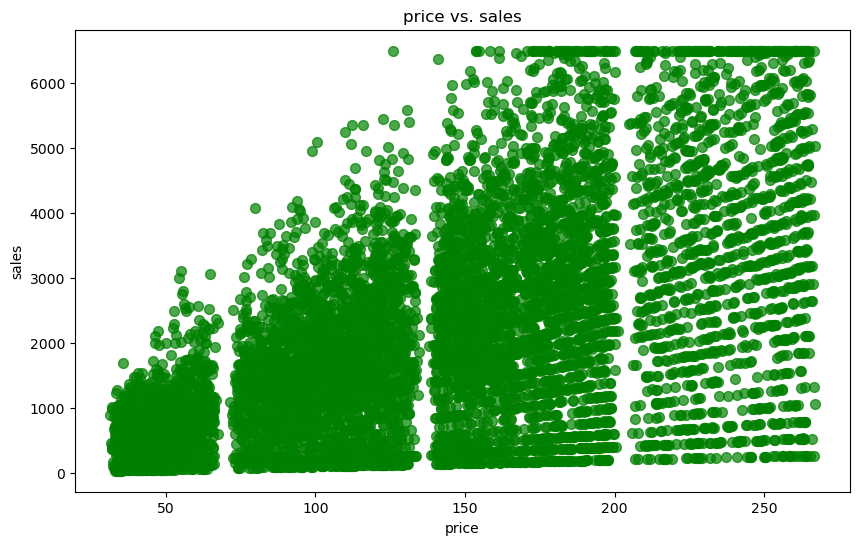

In [69]:
# scatter plot of sales vs price
x=data['Item_MRP']
y=data['Item_Outlet_Sales']
reusable_scatter_plot(x,y, x_label="price",
    y_label="sales",
    title="price vs. sales",
    color='green',
    marker='o')

In [70]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Is_Visibility_Zero'],
      dtype='object')

as we see the above scatter plot as the price increase the sales of the item also increase so from this we conclude that item_MRP is kep predictor for sales 

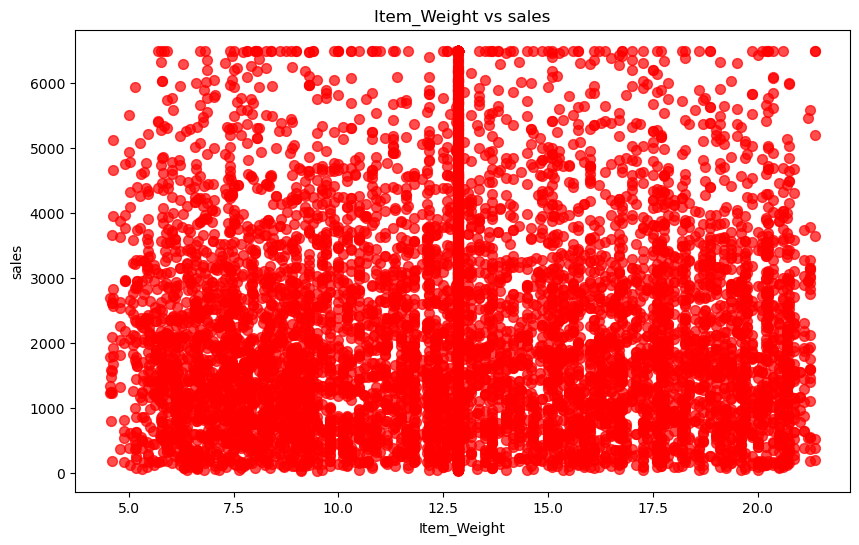

In [72]:
# scatter plot for wight vs sales 
x=data['Item_Weight']
y=data['Item_Outlet_Sales']
reusable_scatter_plot(x,y, x_label="Item_Weight",
    y_label="sales",
    title="Item_Weight vs sales",
    color='red',
	name="dddddd.png",				  
    marker='o')
   

from this scatter plot sales vs weight there is no obvious pattern since the point has  randomly distributed so there is almost no relationship between weight and sales
or wight is not key predictor for sales.

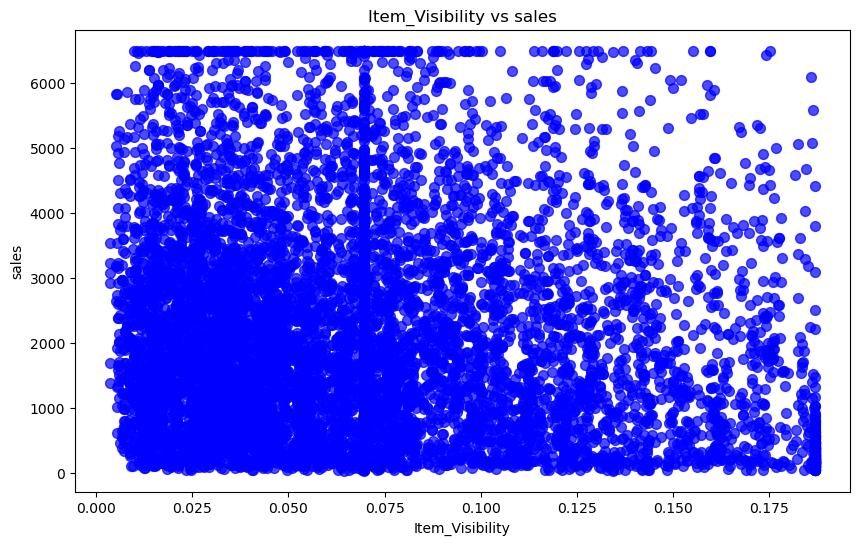

In [76]:
# scatter plot of sales vs visibility
x=data['Item_Visibility']
y=data['Item_Outlet_Sales']
reusable_scatter_plot(x,y, x_label="Item_Visibility",
    y_label="sales",
    title="Item_Visibility vs sales",
    color='blue',
	name="vvvv.png",				  
    marker='o')

and also the scatter plot visibility vs sales there is weak but negative relationship 

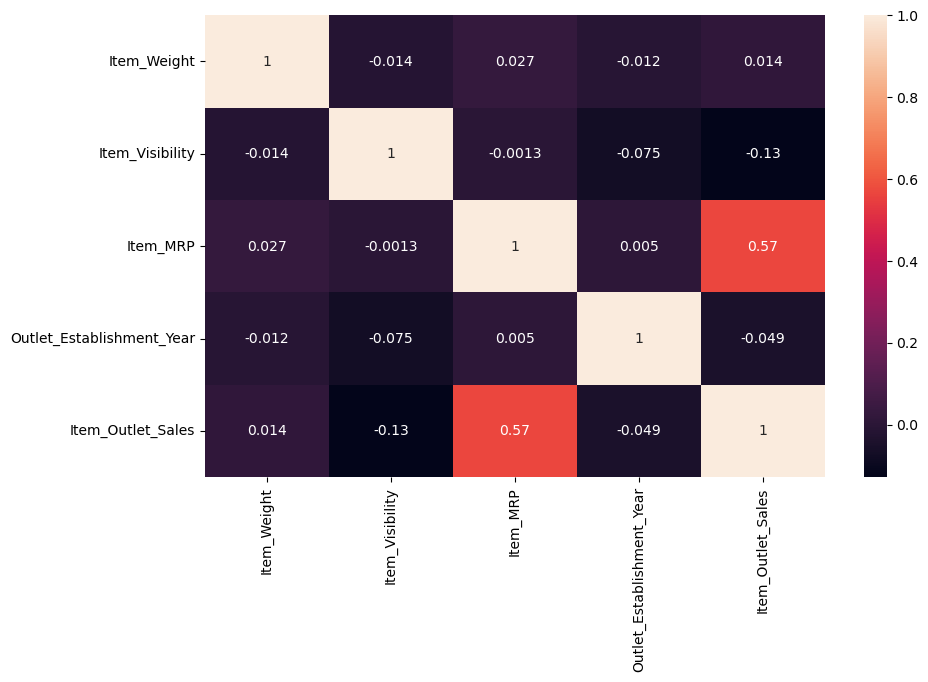

In [34]:
# we use heat map to know multicolinearity between variable and the corrlation of each numerical variable to the target varaible 
numeric_data=data.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True)
plt.savefig("heat map.png")
plt.show()

#### generally Correlation Heatmap:Colors show strength of relationships:

###### Dark red = strong positive (e.g., Sales & MRP).

###### Dark blue = strong negative (e.g., Sales & Visibility).

###### Near zero = no relationship.
###### --Key Interpretations from the Heatmap
--the Correlation of Variable 'Item_Weight' to 'Item_Outlet_Sales(target variable)' =0.014 this means Very weak positive correlation → likely not useful for prediction.		
--- Correlation of Variable 'Item_visiblity' to 'Item_Outlet_Sales(target variable)' =-0,13 Weak negative correlation → possibly due to outliers or skewness.
'Item_MRP'=0.57	Strong positive correlation → a key predictor of sales.
Outlet_Establishment_Year -0.049	Very weak negative correlation → age of store may have little to no effect on sales.


#### 2. Categorical vs Numerical Relationships

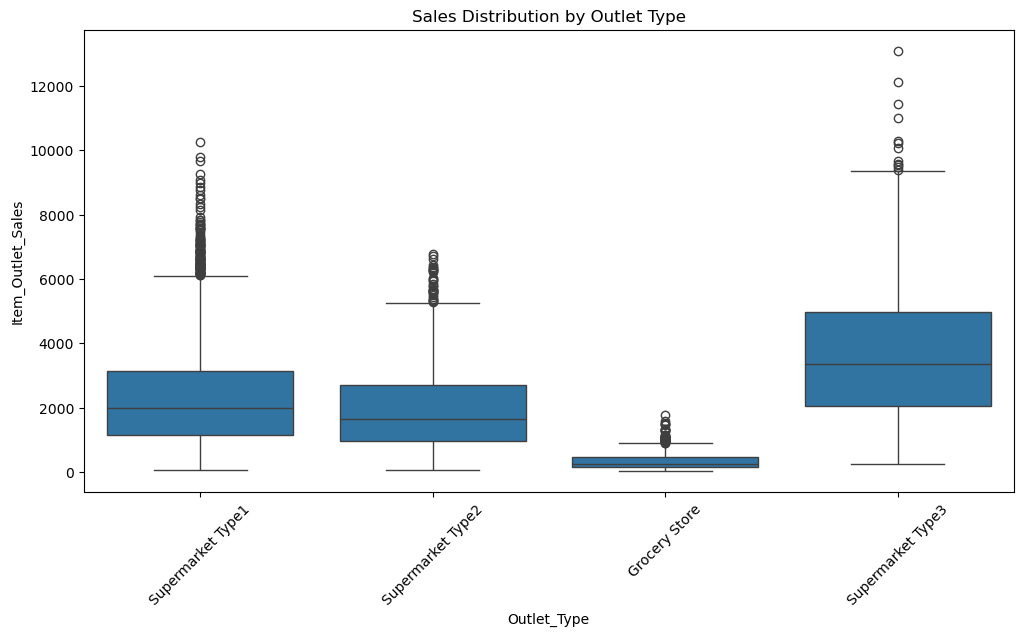

In [35]:
# Sales by Outlet Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)
plt.title('Sales Distribution by Outlet Type')
plt.xticks(rotation=45)
plt.savefig("sals map.png")
plt.show()


##### 1 Sales by Outlet Type:
###### What it shows:
#### Visual Clues:

--Outliers = Exceptional cases .

Boxes = Sales distribution for each store type (Supermarket Type1, Type2, Type3, Grocery Stores).

Median line (middle of box) = Typical sales performance.

Whiskers = Range of "normal" sales (excluding outliers).

Interpretation:
##### Supermarket Type3 has:

Higher median sales → Likely the most profitable store type.

Longer whiskers → Sales vary widely (some branches perform exceptionally well/poorly).

#### Grocery Stores have:

Lower median sales → Generally underperform compared to supermarkets.

Short whiskers → Consistent but low sales.

##### Business Insight:

--Invest more in Supermarket Type3 (high potential).

--Investigate why Grocery Stores lag (e.g., location, product mix).



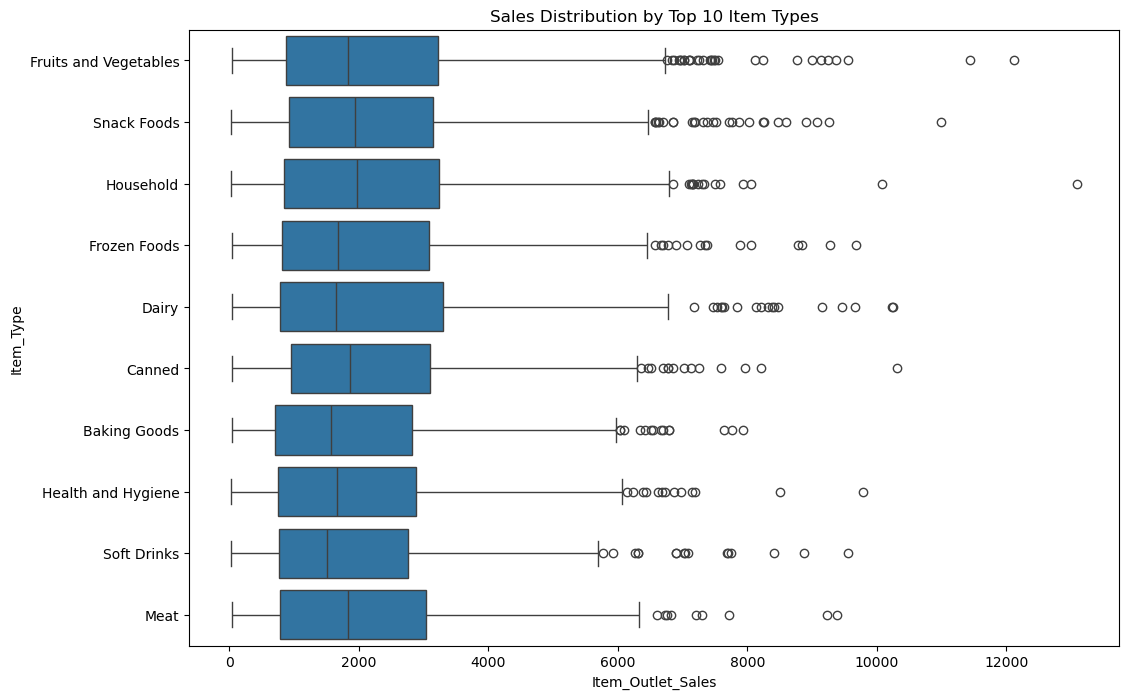

In [21]:
# Sales by Item Type (top 10 for readability)
top_item_types = data['Item_Type'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(y='Item_Type', x='Item_Outlet_Sales', 
            data=data[data['Item_Type'].isin(top_item_types)],
            order=top_item_types)
plt.title('Sales Distribution by Top 10 Item Types')
plt.show()


#### 2. Sales by Item Type
Each box represents sales distribution for an item category (e.g., Snacks, Dairy, Fruits).
Interpretation:
item like Snack Foods,vegitable,household,meat and canned have 'Tall box' → High median sales (popular category)that have more sales 
Long top whisker → Some of those  products sell exceptionally well.
and there are item with Short box → Low median sales (less demand) or have less sales 
#### Business Insight:
--Stock more item that have high-performing sales.

#### time based analysis

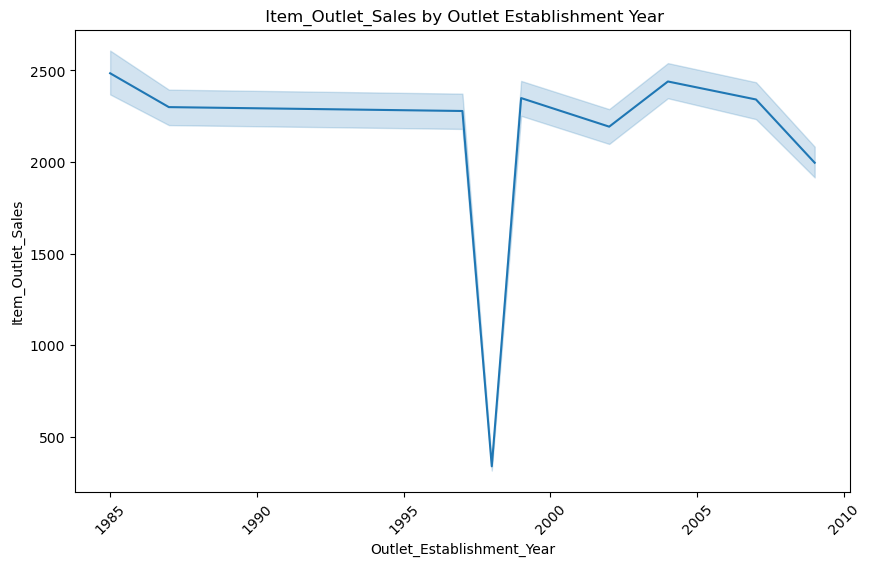

In [22]:
# Average MRP over years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', 
             data=data, estimator='mean')
plt.title(' Item_Outlet_Sales by Outlet Establishment Year')
plt.xticks(rotation=45)
plt.show()

from the line chart we observe that Stable Trend with Slight Variation:
Overall, the mean Item_MRP remains relatively stable across different establishment years, indicating that outlet age doesn't significantly affect sales.
Minor fluctuations suggest slight changes  market conditions, but nothing drastic.


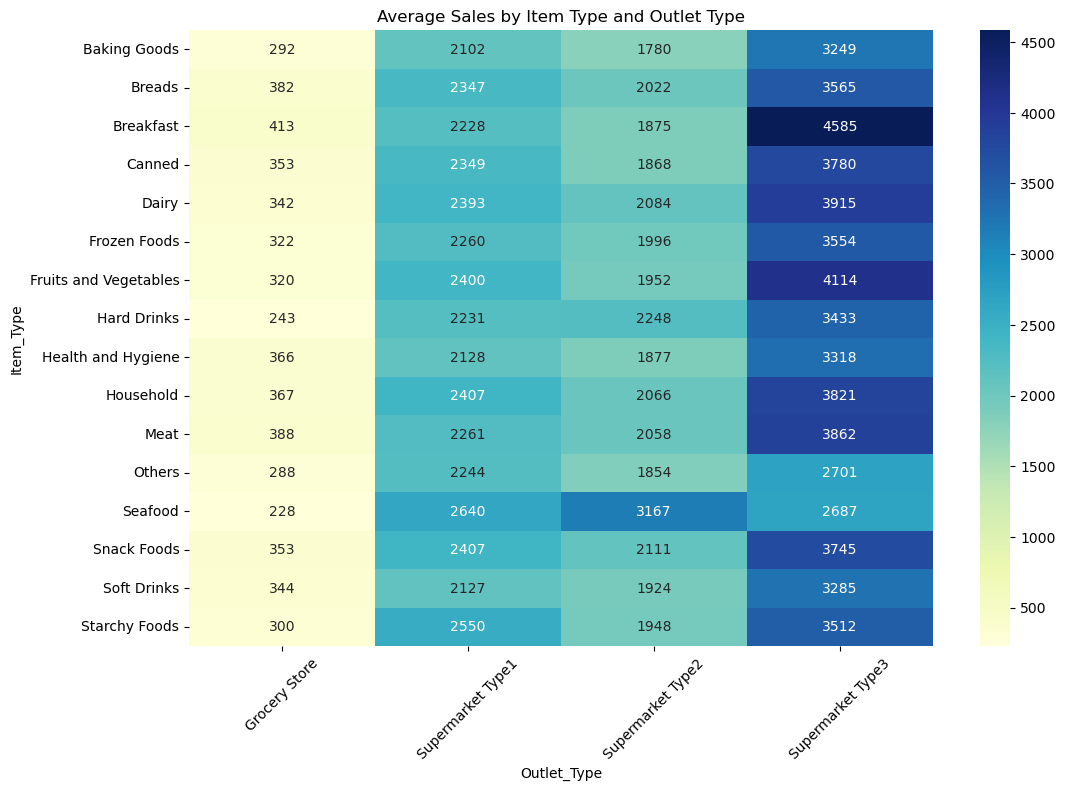

In [37]:
# Sales by Item Type and Outlet Type (heatmap)
cross_tab = pd.crosstab(
    index=data['Item_Type'],
    columns=data['Outlet_Type'],
    values=data['Item_Outlet_Sales'],
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Average Sales by Item Type and Outlet Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("salsq map.png")
plt.show()

In [51]:
data.isnull().sum() # cheeking the total missing values of each columns

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

from the above We can observe that we are having:
2410  missing values in the Outlet_Size feature which is a categorical feature.and 
1463 missing values in the Item_Weight feature so we have handle thode properly in the data preprocessing step

In [52]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

from the above code we see that 526 product have zero visibility:It measures:
How visible a product is in the store (like how easily customers can see it).
Normally:
A higher visibility (like 0.10) → product is placed well (like at eye level, front shelf).
A lower visibility (like 0.01) → product is hidden or less obvious.
 Logically, no product should have exactly 0 visibility in a real store! So zeros probably mean:Data entry mistake or Missing information so 
we have to replace it with the mean of the non_zero visibility. unless we  leave zeros in, they may  mislead the model badly!

In [53]:
first_data1=data.copy()# keep orginasl data 

In [54]:
data.duplicated().sum()  # cheek duplication in the data set 

0

## 4. Data Preprocessing


in this step we try to fix the problem that we have seen the EDA step
--Handle missing values (impute or drop).
--Remove or cap outliers.
--Encode categorical variables (e.g., one-hot encoding).
--correcting inconsistent label or entry error etc


##### treating zero visibility

In [42]:

# 1. Create a flag to identify zero visibility showing if the product originally had zero visibility.This helps XGBoost learn if zero visibility is an important factor in sales prediction.
# This tells the model that this product originally had zero visibility
data['Is_Visibility_Zero'] = data['Item_Visibility'].apply(lambda x: 1 if x == 0 else 0)
# 2. Replace zero visibility with the mean of non-zero visibility values
# Calculate the mean of 'Item_Visibility', ignoring zeros
mean_visibility = data.loc[data['Item_Visibility'] != 0, 'Item_Visibility'].mean()
# Replace zeros with the mean value
data['Item_Visibility'] = data['Item_Visibility'].replace(0, mean_visibility)

# Now, 'Item_Visibility' is fixed,and we have a flag for zero visibility ('Is_Visibility_Zero')


In [43]:
data['Item_Visibility'].value_counts() 

Item_Visibility
0.069603    526
0.195979    144
0.076975      3
0.107224      2
0.073562      2
           ... 
0.124646      1
0.054142      1
0.018920      1
0.044974      1
0.044878      1
Name: count, Length: 7737, dtype: int64

##### capping outlier 

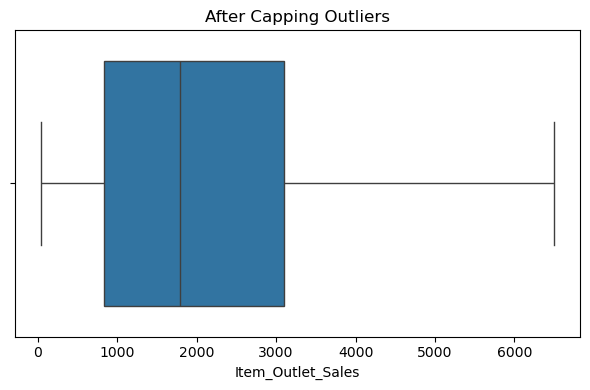

In [44]:
# function to detect outlier in 'Item_Outlet_Sales' column
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    
    return df

data= cap_outliers(data, 'Item_Outlet_Sales')
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title("After Capping Outliers")
plt.tight_layout()
plt.savefig("sales after capping outlier.png")
plt.show()

In [45]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Is_Visibility_Zero
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0
3,FDX07,19.20,Regular,0.069603,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1
4,NCD19,8.93,Low Fat,0.069603,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1


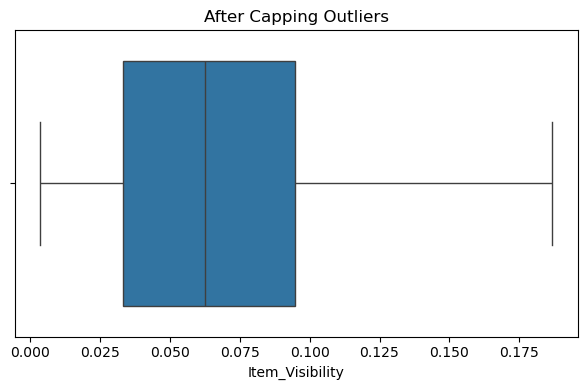

In [46]:
# outlier capping for item_visibility column
data= cap_outliers(data, 'Item_Visibility')
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Item_Visibility'])
plt.title("After Capping Outliers")
plt.tight_layout()
plt.savefig("visiblity after capping outlier.png")
plt.show()


#### handling missing values
--Item_Weight numeric fill by its mean
--Outlet_Size catagorical fill by its mode


In [47]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Is_Visibility_Zero'],
      dtype='object')

In [48]:
weighet_mean=data['Item_Weight'].mean() # computing the mean value of the column 'outlet_wighet' 
print(weighet_mean)
data['Item_Weight'] = data['Item_Weight'].fillna(weighet_mean)

12.857645184135976


In [49]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Is_Visibility_Zero              0
dtype: int64

In [50]:
# Fill missing Outlet_Size based on the mode of each Outlet_Type group
data['Outlet_Size'] = data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))


In [51]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Is_Visibility_Zero           0
dtype: int64

In [52]:
# correcting the entry error above in 'Item_Fat_Content' column
data=data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}) 

C:\Users\HP\AppData\Local\Temp\ipykernel_18320\3270068070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content',data=data,palette='Set2')


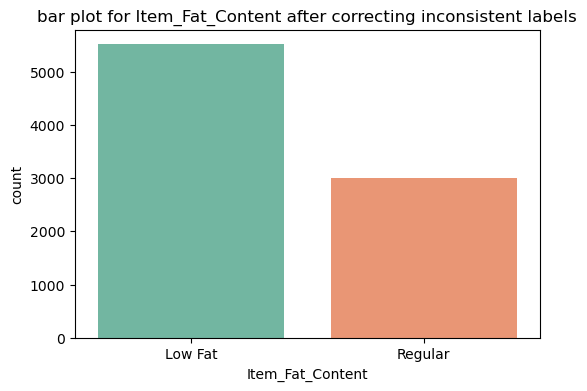

In [54]:
# the plot of 'Item_Fat_Content' after correcting the entry error or inconsistent labels
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content',data=data,palette='Set2')  
plt.title('bar plot for Item_Fat_Content after correcting inconsistent labels')
plt.savefig("corrected1.png")
plt.show()

## 5.feature enginering

In [77]:
data['Outlett_age']=2025-data['Outlet_Establishment_Year'] # compute the age of the store 

In [78]:
data=data.drop('Outlet_Establishment_Year',axis=1)

In [79]:
data['Item_catagory']=data['Item_Identifier'].apply(lambda x:x[:2])# creating item_catogory form item_identifer

In [80]:
data=data.drop('Item_Identifier',axis=1)

In [81]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Is_Visibility_Zero,Outlett_age,Item_catagory
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,0,26,FD
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,0,16,DR
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,0,26,FD
3,19.20,Regular,0.069603,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,1,27,FD
4,8.93,Low Fat,0.069603,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,1,38,NC


### 6 Label Encoding for catagorical Features


In [82]:
print(data['Outlet_Identifier'].head())


0    OUT049
1    OUT018
2    OUT049
3    OUT010
4    OUT013
Name: Outlet_Identifier, dtype: object


In [83]:
import joblib
import pickle 
encoder = LabelEncoder()
# Fit on strings (the original labels in your dataset)
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
# Save the fitted encoder
joblib.dump(encoder, 'encoder_outlet_identifier.pkl')
le_outlet_id =joblib.load('encoder_outlet_identifier.pkl')
print(le_outlet_id .classes_)

data['Item_Type']=encoder.fit_transform(data['Item_Type'])
joblib.dump(encoder, 'encoder_Item_Type.pkl')
le_Item_Type =joblib.load('encoder_Item_Type.pkl')
print(le_Item_Type.classes_)

data['Outlet_Size']=encoder.fit_transform(data['Outlet_Size'])
joblib.dump(encoder,'encoder_Outlet_Size.pkl')
le_outlet_size=joblib.load('encoder_outlet_Size.pkl')
print(le_outlet_size.classes_)

data['Item_catagory']=encoder.fit_transform(data['Item_catagory'])
joblib.dump(encoder, 'encoder_Item_catagory.pkl')
le_Item_catagory=joblib.load('encoder_Item_catagory.pkl')
print(le_Item_catagory.classes_)

data['Outlet_Type']=encoder.fit_transform(data['Outlet_Type'])
joblib.dump(encoder, 'encoder_Outlet_Type.pkl')
le_Outlet_Type=joblib.load('encoder_Outlet_Type.pkl')
print(le_Outlet_Type.classes_)

data['Outlet_Location_Type']=encoder.fit_transform(data['Outlet_Location_Type'])
joblib.dump(encoder, 'encoder_Outlet_Location_Type.pkl')
le_Outlet_Location_Type=joblib.load('encoder_Outlet_Location_Type.pkl')
print(le_Outlet_Location_Type.classes_)

data['Item_Fat_Content']=encoder.fit_transform(data['Item_Fat_Content'])
joblib.dump(encoder, 'encoder_Item_Fat_Content.pkl')
le_Item_Fat_Content=joblib.load('encoder_Item_Fat_Content.pkl')
print(le_Item_Fat_Content.classes_)
print(" Categorical features encoded and encoders saved.")

['OUT010' 'OUT013' 'OUT017' 'OUT018' 'OUT019' 'OUT027' 'OUT035' 'OUT045'
 'OUT046' 'OUT049']
['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
['High' 'Medium' 'Small']
['DR' 'FD' 'NC']
['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']
['Tier 1' 'Tier 2' 'Tier 3']
['Low Fat' 'Regular']
 Categorical features encoded and encoders saved.


In [84]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Is_Visibility_Zero,Outlett_age,Item_catagory
0,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,0,26,1
1,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,0,16,0
2,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,0,26,1
3,19.20,1,0.069603,6,182.0950,0,2,2,0,732.3800,1,27,1
4,8.93,0,0.069603,9,53.8614,1,0,2,1,994.7052,1,38,2


## defining training and testing data 

In [85]:
x=data.drop(columns=['Item_Outlet_Sales'],axis=1) # defining feature and target varible 
y=data['Item_Outlet_Sales']

In [86]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2,random_state=42) # spliting the data set 

## best model xgbboost

In [87]:
xgb=XGBRegressor(n_estimators=400,learning_rate=0.01 ,max_depth=3)
xgb.fit(x_train,y_train)  # fit the model 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

In [88]:
model_pred_train= xgb.predict(x_train)
print(model_pred_train)
# accuracy measure for train data 
mse= mean_squared_error(y_train, model_pred_train)
rmse = np.sqrt(mse)
print("evalution metrics for train\n")
print("MSE:", mse)
print("RMSE:", rmse)
r2 = r2_score(y_train, model_pred_train)
print("R² Score:", r2)


[2886.0347 2797.2058 1814.9609 ... 3835.1833 1918.0945 1534.0964]
evalution metrics for train

MSE: 1024725.9935748321
RMSE: 1012.2875053930243
R² Score: 0.6164791445192946


In [89]:
model_pred_test= xgb.predict(x_test)
print(model_pred_test)
# accuracy measure for test data 
print("evalution metrics for test\n")

mse = mean_squared_error(y_test, model_pred_test)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, model_pred_test)
print("R² Score:", r2)


[1297.2607  778.0136  778.0136 ...  759.8587  729.4243 1668.7495]
evalution metrics for test

MSE: 931451.8773060978
RMSE: 965.1175458492596
R² Score: 0.6280125062138553


# Feature importance cheeking 

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

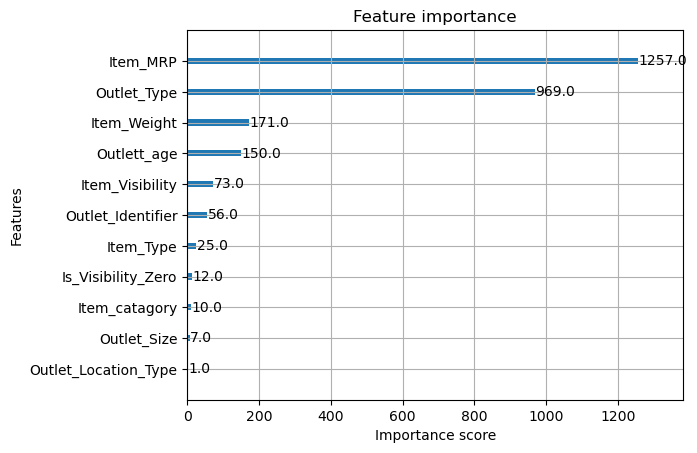

In [90]:
from xgboost import plot_importance
plot_importance(xgb)


Key Observations
---Dominant Features:
Item_MRP (Maximum Retail Price) is by far the most important feature (bar stretches furthest to the right). This suggests pricing is the strongest predictor in your model.
Outlet_Type is the second-most important (score: 1257), likely indicating that the type of store (e.g., supermarket vs. grocery) significantly impacts predictions.
---Moderate Impact:
Item_Weight (171) and Outlet_Age (150) have moderate influence.
Item_Visibility (73) also plays a role but is less critical.
---Weak/Negligible Features:
Outlet_Identifier, Item_Type, Item_Category, and Outlet_Size have low scores (≤56), meaning they contribute little to predictions.
Outlet_Location_Type (score: 1) is almost irrelevant in this model.


In [91]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Is_Visibility_Zero', 'Outlett_age',
       'Item_catagory'],
      dtype='object')

In [92]:
key_data=data.drop(columns=['Item_Fat_Content','Item_Type','Outlet_Size','Is_Visibility_Zero','Item_catagory','Outlet_Location_Type'],axis=1)

In [93]:
x_final=key_data.drop(columns=['Item_Outlet_Sales'],axis=1)
y_final=key_data['Item_Outlet_Sales']

In [94]:
x_final.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Type', 'Outlett_age'],
      dtype='object')

In [95]:
x_train, x_test, y_train, y_test=train_test_split(x_final, y_final, test_size=0.2,random_state=42) # spliting the data set 

In [96]:
xgb_final=XGBRegressor(n_estimators=400,learning_rate=0.01 ,max_depth=3,)
xgb_final.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

In [97]:
model_pred_train_2= xgb_final.predict(x_train)
print(model_pred_train_2)
# accuracy measure for train data 
mse= mean_squared_error(y_train, model_pred_train_2)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
r2 = r2_score(y_train, model_pred_train_2)
print("R² Score:", r2)


[2887.3994 2796.166  1815.3153 ... 3831.1797 1918.5862 1531.7902]
MSE: 1025654.3996899758
RMSE: 1012.745969969753
R² Score: 0.6161316729905679


In [98]:
model_pred_test_2= xgb_final.predict(x_test)
print(model_pred_test_2)
# accuracy measure for test data 
mse = mean_squared_error(y_test, model_pred_test_2)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, model_pred_test_2)
print("R² Score:", r2)


[1294.1439   777.18286  777.18286 ...  762.5404   733.71277 1667.558  ]
MSE: 931694.5965163673
RMSE: 965.2432835903948
R² Score: 0.6279155731216347


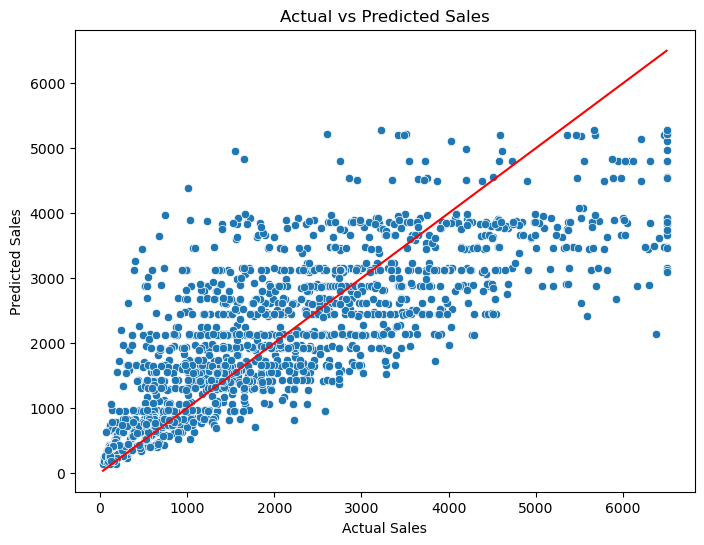

In [99]:
#Assume y_test = true values, y_pred = model predictions
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=model_pred_test_2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')  # 45-degree line
plt.savefig("accuracy after cappr.png")
plt.show()


In [100]:
pred = xgb_final.predict(np.array([[45,0.01,320,1,0,24]]))[0]
print(pred)  # prediction on unseen data 

1193.4785


In [101]:
import joblib
joblib.dump(xgb_final,'bigmart_model.pkl') # saving the model using file name 'bigmart_model'.


['bigmart_model.pkl']

In [102]:
model=joblib.load('bigmart_model.pkl') # load the saved model

In [103]:
pred = model.predict(np.array([[4,0.07,1000,1,0,24]]))[0]
print(pred)

897.9222


## GUI graphical user interface /model deployment

In [104]:
import tkinter as tk 
from tkinter import messagebox
from tkinter.ttk import Combobox
import pandas as pd
import joblib

# Load model and encoders
model = joblib.load('bigmart_model.pkl')
le_outlet_type = joblib.load('encoder_outlet_type.pkl')
le_outlet_id = joblib.load('encoder_outlet_identifier.pkl')

# Use exact category labels the model was trained on
outlet_id_options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']
outlet_type_options = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']

# Prediction function
def predict_sales():
    try:
        item_weight = float(entry_weight.get())
        item_visibility = float(entry_visibility.get())
        item_mrp = float(entry_mrp.get())
        outlet_id = combo_outlet_id.get()
        outlet_type = combo_outlet_type.get()
        outlet_age = int(entry_outlet_age.get())

        # Encode
        outlet_id_encoded = le_outlet_id.transform([outlet_id])[0]
        outlet_type_encoded = le_outlet_type.transform([outlet_type])[0]

        # Input DataFrame
        input_df = pd.DataFrame({
            'Item_Weight': [item_weight],
            'Item_Visibility': [item_visibility],
            'Item_MRP': [item_mrp],
            'Outlet_Identifier': [outlet_id_encoded],
            'Outlet_Type': [outlet_type_encoded],
            'Outlett_age': [outlet_age]
        })

        # Predict
        prediction = model.predict(input_df)[0]
        messagebox.showinfo("Prediction", f"Predicted Sales: ${prediction:.2f}")

    except Exception as e:
        messagebox.showerror("Error", f"Something went wrong.\n{e}")

# Reset function to clear the fields
def reset_fields():
    entry_weight.delete(0, tk.END)
    entry_visibility.delete(0, tk.END)
    entry_mrp.delete(0, tk.END)
    combo_outlet_id.set(outlet_id_options[0])
    combo_outlet_type.set(outlet_type_options[0])
    entry_outlet_age.delete(0, tk.END)

# Create GUI
root = tk.Tk()
root.title("BigMart Sales Prediction")
root.geometry("450x500")

# Widgets
tk.Label(root, text="Item Weight").pack()
entry_weight = tk.Entry(root, width=40)
entry_weight.pack()

tk.Label(root, text="Item Visibility").pack()
entry_visibility = tk.Entry(root, width=40)
entry_visibility.pack()

tk.Label(root, text="Item MRP").pack()
entry_mrp = tk.Entry(root, width=40)
entry_mrp.pack()

tk.Label(root, text="Outlet Identifier").pack()
combo_outlet_id = Combobox(root, values=outlet_id_options, width=37, state="readonly")
combo_outlet_id.set(outlet_id_options[0])
combo_outlet_id.pack()

tk.Label(root, text="Outlet Type").pack()
combo_outlet_type = Combobox(root, values=outlet_type_options, width=37, state="readonly")
combo_outlet_type.set(outlet_type_options[0])
combo_outlet_type.pack()

tk.Label(root, text="Outlet Age").pack()
entry_outlet_age = tk.Entry(root, width=40)
entry_outlet_age.pack()

tk.Button(root, text="Predict Sales", command=predict_sales, bg="green", fg="white").pack(pady=20)

# Reset Button
tk.Button(root, text="Reset", command=reset_fields, bg="red", fg="white").pack(pady=10)

# Run the GUI loop
root.mainloop()
